In [66]:
import sys
sys.path.append('../')

In [67]:
import torch
from lib.config import config
import numpy as np

import cv2
from torchvision import transforms
from torch.nn import functional as F
from PIL import Image

In [68]:
config.defrost()

config.merge_from_file('/home/ubuntu/data/yong/projects/HRNet-Semantic-Segmentation/experiments/people_seg/seg_hrnet_w48_512x512_sgd_lr7e-3_wd5e-4_bs_40_epoch150.yaml')

In [69]:
from lib.models.seg_hrnet import get_seg_model

In [70]:
model = get_seg_model(config)

In [71]:
# from lib.core.criterion import CrossEntropy, OhemCrossEntropy

In [72]:
# criterion = CrossEntropy()

# model = FullModel(model, criterion)

In [73]:
model_dict = model.state_dict()

In [74]:
model_state_file = '/home/ubuntu/data/yong/projects/HRNet-Semantic-Segmentation/output/people/seg_hrnet_w48_512x512_sgd_lr7e-3_wd5e-4_bs_40_epoch150/best.pth'
pretrained_dict = torch.load(model_state_file)
model_dict = model.state_dict()
pretrained_dict = {k[6:]: v for k, v in pretrained_dict.items()
                    if k[6:] in model_dict.keys()}
model_dict.update(pretrained_dict)
model.load_state_dict(model_dict)

<All keys matched successfully>

In [75]:
x = torch.rand((1, 3, 512, 512))

In [91]:
INPUT_IMG_SIZE = 512

img = cv2.imread('../input/mm11.jpg',cv2.IMREAD_COLOR)
h,w,_ = img.shape
image = cv2.resize(img, (INPUT_IMG_SIZE, INPUT_IMG_SIZE))

In [92]:
mean=[0.485, 0.456, 0.406]
std=[0.229, 0.224, 0.225]

In [93]:
image = image.astype(np.float32)[:, :, ::-1]
image = image / 255.0
image -= mean
image /= std

In [94]:
input_tensor = transforms.ToTensor()(image)

In [95]:
input_tensor.size()

torch.Size([3, 512, 512])

In [96]:
input_tensor = input_tensor.unsqueeze(0)

In [97]:
outputs = model(input_tensor)

In [98]:
size = input_tensor.size()

In [99]:
outputs = F.upsample(input=outputs, 
                    size=(size[-2], size[-1]), 
                    mode='bilinear')  

In [100]:
outputs.shape

torch.Size([1, 2, 512, 512])

In [101]:
output = outputs[0].detach().numpy()

In [102]:
output = np.argmax(output, axis=0)


In [103]:
output = (output * 255).astype(np.uint8)
output = cv2.resize(output,(w,h))
output.shape

(1719, 1000)

In [104]:
res = cv2.bitwise_and(img, img, mask=output)

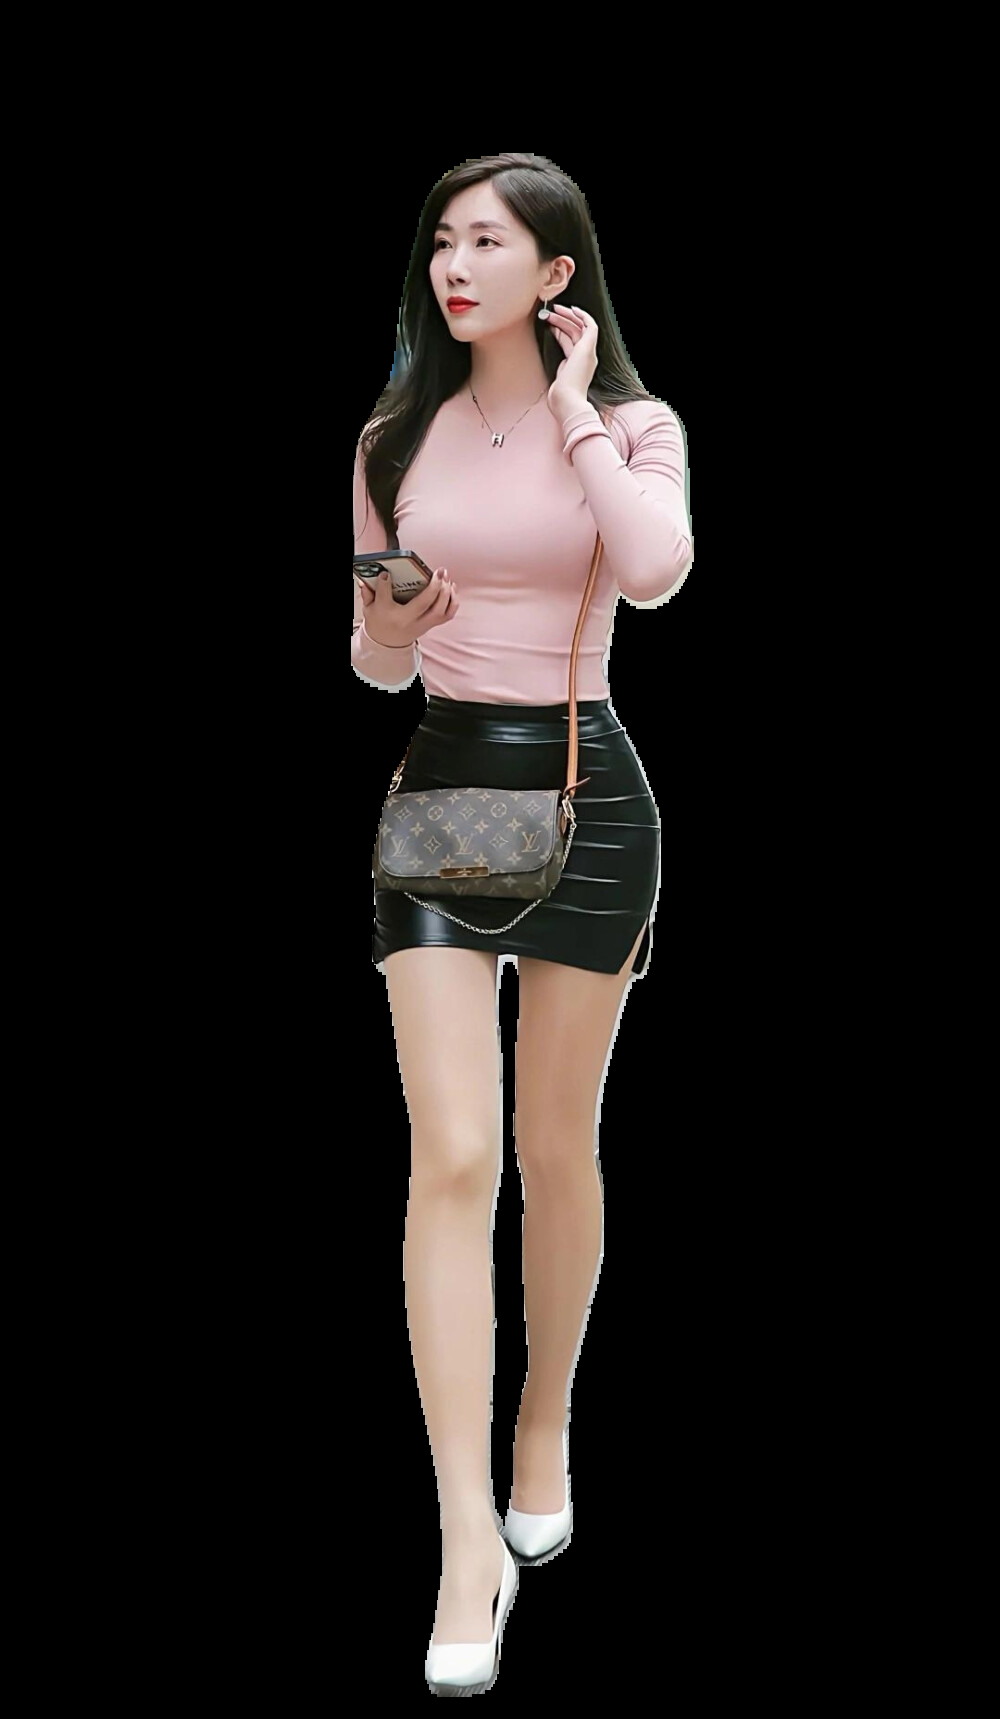

In [105]:
Image.fromarray(res[:, :, ::-1])